# **Clustring with K Means**

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png" width="700" height="600" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_csv("/kaggle/input/the-income-of-some-employees/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

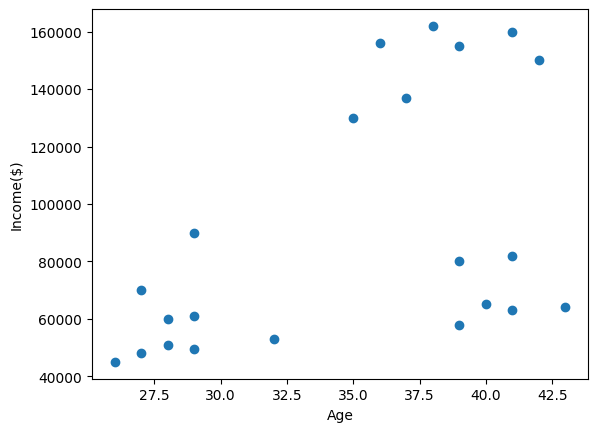

In [3]:
plt.scatter(df.Age, df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [4]:
km= KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [5]:
df["cluster"] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


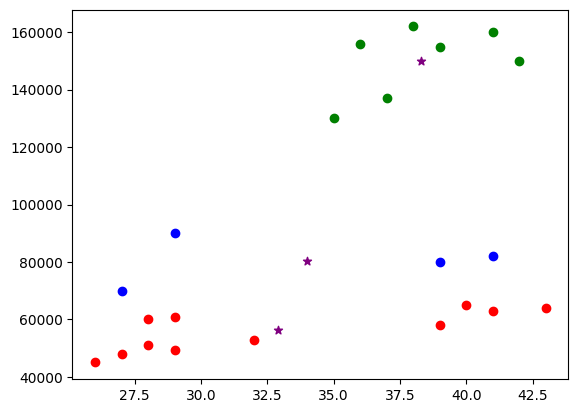

In [6]:
df1 = df[df.cluster== 0]
df2 = df[df.cluster== 1]
df3 = df[df.cluster== 2]
plt.scatter(df1.Age, df1["Income($)"], color="red")
plt.scatter(df2.Age, df2["Income($)"], color="green")
plt.scatter(df3.Age, df3["Income($)"], color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple", marker="*")#(cluster_centers_) is a function that stores the coordinates of the centroids or centers of the clusters that the algorithm has identified in the dataset.
plt.show()

In [7]:
print(df.Age.min())
print(df.Age.max())
print(df["Income($)"].min())
print(df["Income($)"].max())

26
43
45000
162000


### the model didn't work well wiht this big numbers we should make scaling for this data

In [8]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

### we can use also (standard scaler)

In [9]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


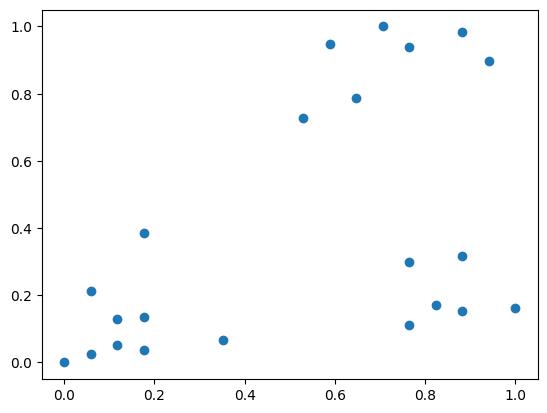

In [10]:
plt.scatter(df.Age, df["Income($)"])

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [12]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


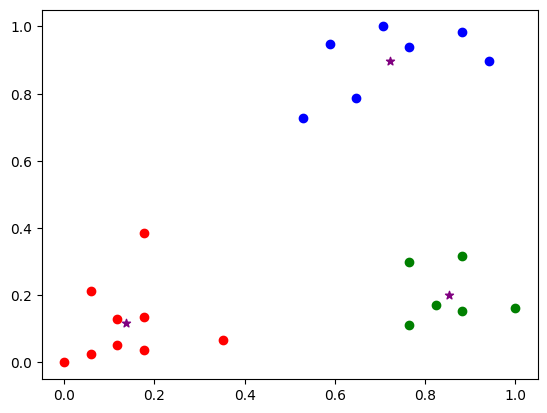

In [13]:
df1 = df[df.cluster== 0]
df2 = df[df.cluster== 1]
df3 = df[df.cluster== 2]
plt.scatter(df1.Age, df1["Income($)"], color="red")
plt.scatter(df2.Age, df2["Income($)"], color="green")
plt.scatter(df3.Age, df3["Income($)"], color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple", marker="*")#(cluster_centers_) is a function that stores the coordinates of the centroids or centers of the clusters that the algorithm has identified in the dataset.
plt.show()

# **Elbow Plot**

### An elbow plot is a graphical tool used in unsupervised learning, particularly in clustering algorithms like KMeans, to determine the optimal number of clusters for a given dataset. It helps to find the point where increasing the number of clusters does not significantly improve the model's performance.

<img src="https://www.oreilly.com/api/v2/epubs/9781788295758/files/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png" width="700" height="600" />

In [14]:
sse = []
for i in range (1, 20):
    km = KMeans(n_clusters=i)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

In [15]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2818479744366238,
 0.21066678488010526,
 0.17299621932455464,
 0.13265419827245162,
 0.11182079723210357,
 0.07831232180040332,
 0.06367938021444068,
 0.046811684349391744,
 0.03810151092446364,
 0.030426552928992823,
 0.02336003499387405,
 0.01641649105272562,
 0.011033819491365383,
 0.007513957485122411,
 0.0054551225809321684]

([<matplotlib.axis.XTick at 0x79a109c144f0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

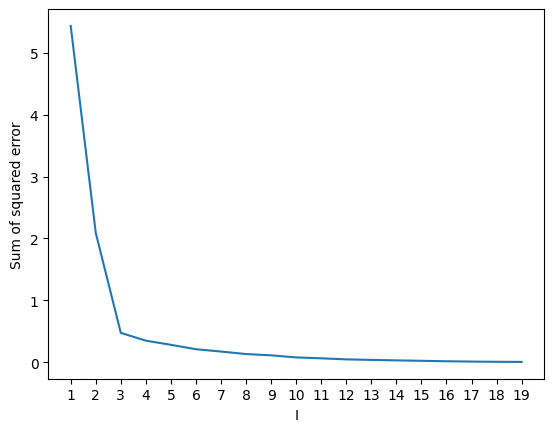

In [16]:
plt.plot(range(1, 20), sse)
plt.xlabel("I")
plt.ylabel("Sum of squared error")
plt.xticks(range(1, 20))

### the best number of clusters is 3 